# Employee Retention Issue – A Predictive Analysis


## Overview

Employee attrition or turnover occurs when an employee leaves the organization. 
It is different from employee discharge, termination, resignation, and abandonment. 
In the case of employee attrition, when an employee leaves the company, the employee position remains unfilled. 
But in the case of turnover, the position is filled by a replacement employee.

It is a critical problem for employers as it impacts their growth and ability to complete. 
Here, I will discuss how we can build a model that can help the HR team in identifying employees 
that can leave the organization so that they can work with employees and take corrective measures 
to reduce the attrition rate problem by working with employees at risk of leaving the organization. 
In Data Science word to deal with this type of issue the term used is “Employee churn analytics” 
which is the process of evaluating employee staff turnover rates to predict the future and reduce 
employee churn. For this project, I am using IBM employee data from [Kaggle](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset). I will use this 
dataset to understand different features within the dataset and then use the same to build 
machine learning models using different algorithms to find what algorithm works best and what is accuracy.  


## Analyse to know our data

First we will start with understanding about out data like what fields are present, what kind of data is there, is there any missing value..etc.

In [50]:
# Import require libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, make_scorer
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier


from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
import tensorflow.compat.v1 as td
td.disable_v2_behavior()

In [2]:
# Read our data
employee_data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
# View some sample records
employee_data.head(8)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0


Let's check structure and datatypes

In [4]:
employee_data.shape

(1470, 35)

In [5]:
employee_data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

Let's check to see if there is any missing value

In [6]:
employee_data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Let's get the basic stats of the data features

In [7]:
employee_data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## So far what we learned

1. Input data has 1470 records and 35 features. 
1. There is no missing values
1. ***EmployeeCount*** feature seems to be useless as all records have same value that is '1'.
1. We should no utilize feature ***EmployeeNumber*** in analysis as it teams to be employee identifier and should not have any influence.
1. ***StandardHours*** feature seems to be useless as all records have same value that is '80'.

Lets get to know categorical data

In [8]:
for column in employee_data.columns:
  if employee_data[column].dtype == object:
    print("{} : {}".format(str(column), str(employee_data[column].unique())))
    print(employee_data[column].value_counts())
    print("-----------------------------------------------------\n\n")

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
-----------------------------------------------------


BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
-----------------------------------------------------


Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
-----------------------------------------------------


EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
-----------------------------------------------------


Gender : ['Female' 'Male']
Male      882
Female

## What we learned from categorial data view

1. Attrition data is imbalanced. 
1. ***Over18*** feature seems to be useless as all records have same value that is 'Y'.

## Removing usless fields

1. *EmployeeCount*
1. *EmployeeNumber*
1. *StandardHours*
1. *Over18*

In [9]:
employee_data = employee_data.drop('EmployeeCount', axis=1)
employee_data = employee_data.drop('EmployeeNumber', axis=1)
employee_data = employee_data.drop('StandardHours', axis=1)
employee_data = employee_data.drop('Over18', axis=1)

## Lets visualize data

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

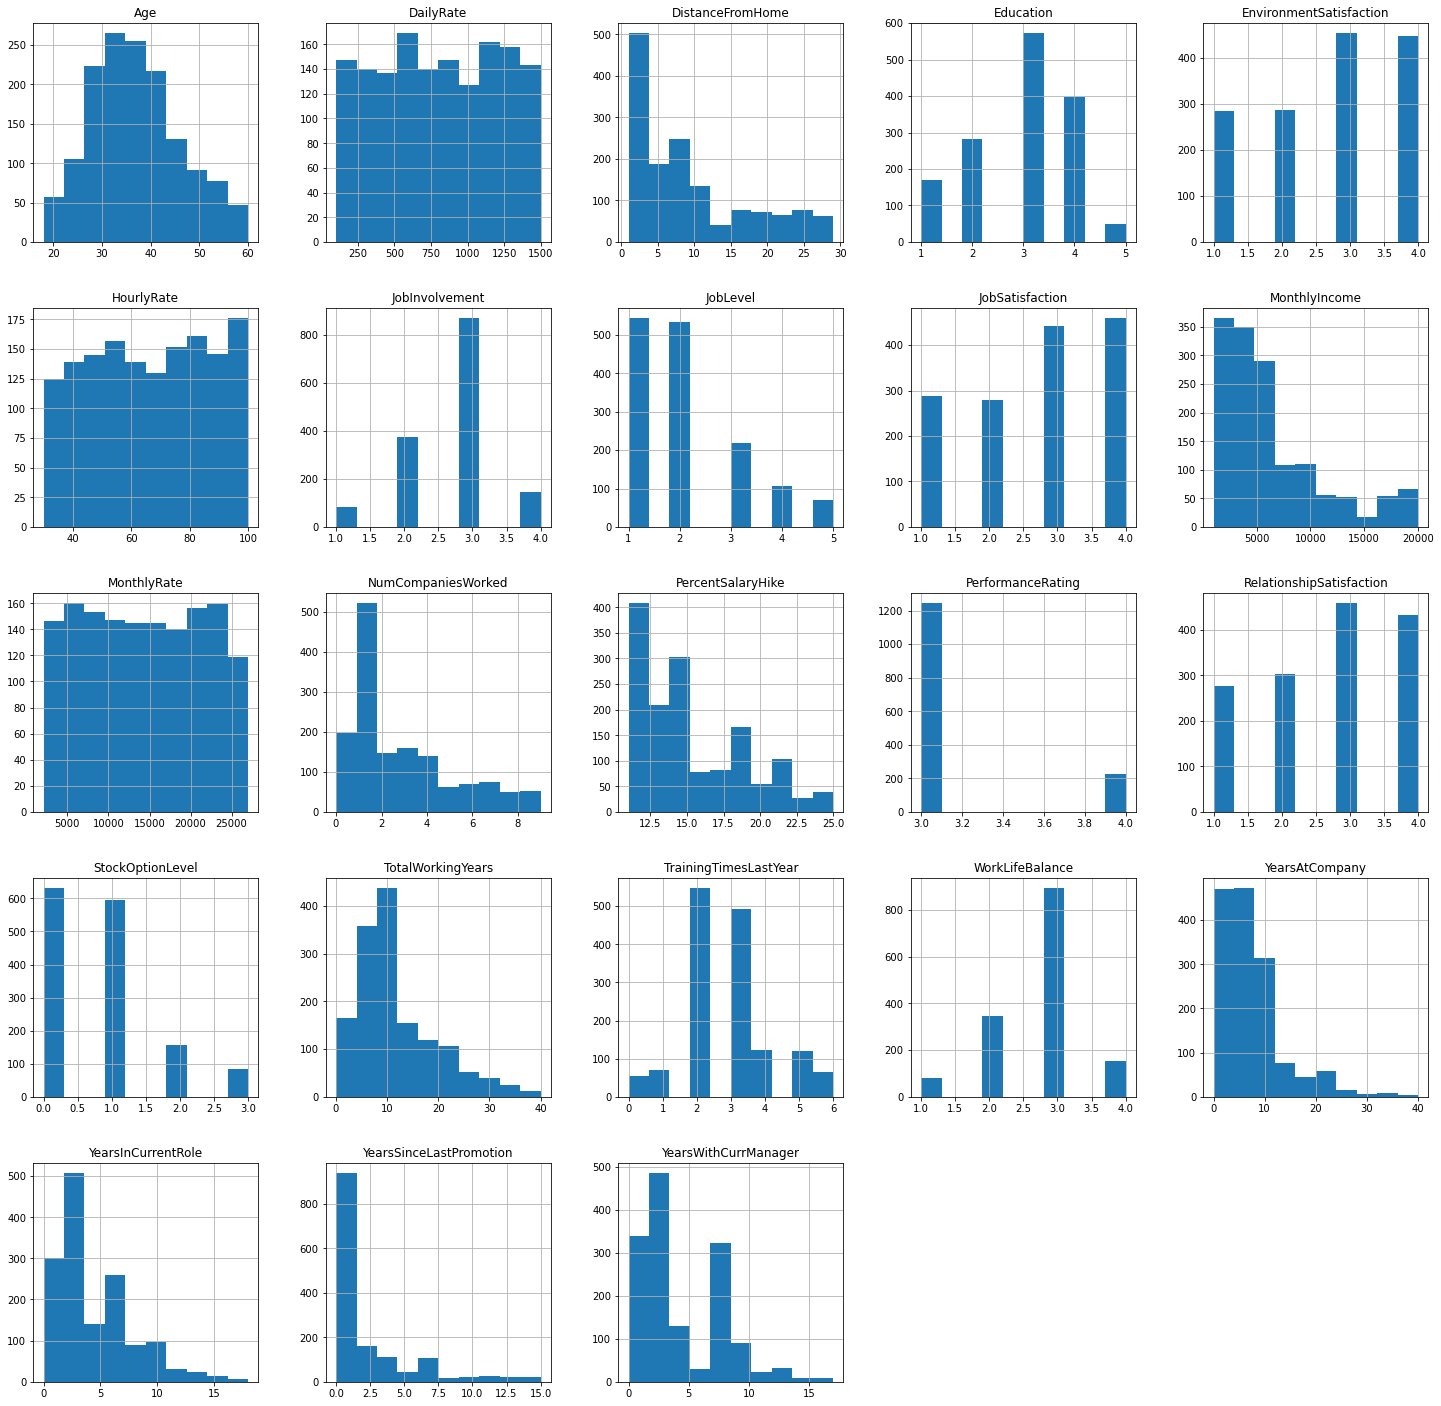

In [10]:
# Plot histogram

employee_data.hist(figsize=(25,25))

### Lets check correlation of fields with each other

<AxesSubplot:>

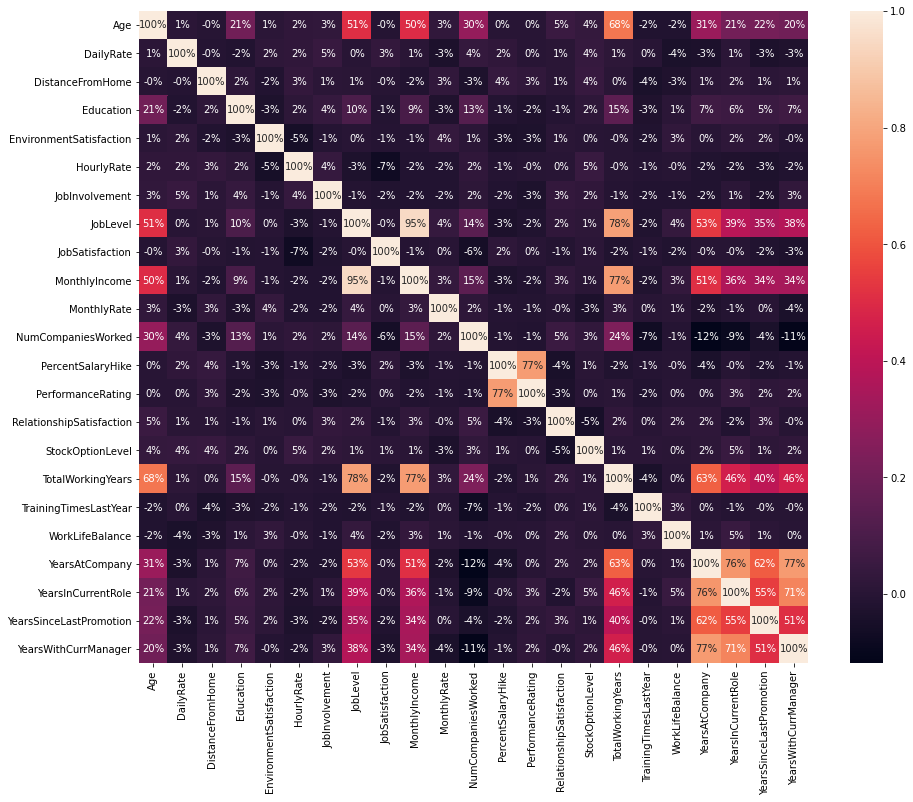

In [11]:
plt.subplots(figsize=(15,12))
sns.heatmap(employee_data.corr(), annot=True, fmt='.0%')

What we found from correlation plot ?

1. *MonthlyIncome* positively correlates to *JobLevel* and it makes sense.
1. *PercentageSalaryHike* positively correlates to PerformanceRating and it makes sense too.
1. *TotalWorkingYears* positively correlates to *JobLevel* as well as *MonthlyIncome* and *Age*. 
1. *YearsAtCompany* positively correlates to *TotalWorkingYears*.
1. *YearsWithCurrentManager* positively correlates to *YearsAtCompany* and *YearsAtCurrentRole*.
1. *YearsAtCurrentRole* correlates to *YearsAtCompany*. 

These correlation seems to be natual/normal and expected.



### Lets further look

1. Attrition count plot

<AxesSubplot:xlabel='Attrition', ylabel='count'>

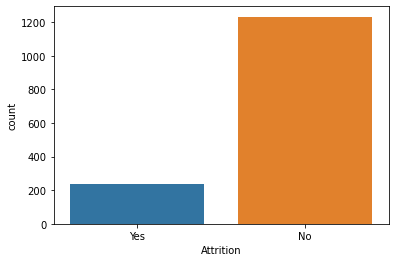

In [12]:
## Countplot on Attrition
sns.countplot(x=employee_data['Attrition'])

In [13]:
## Creating temporary attrition dataframe
at = pd.DataFrame(employee_data.Attrition.astype("category").cat.codes)
at.columns = ['attrition']

2. Business Travel vs Attrition

<AxesSubplot:xlabel='BusinessTravel', ylabel='attrition'>

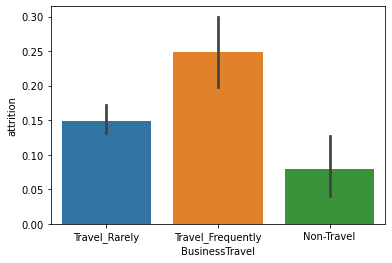

In [14]:
sns.barplot(data=employee_data, x='BusinessTravel', y=at['attrition'])

3. Overtime vs Attrition

[Text(0, 0, 'Yes'), Text(1, 0, 'No')]

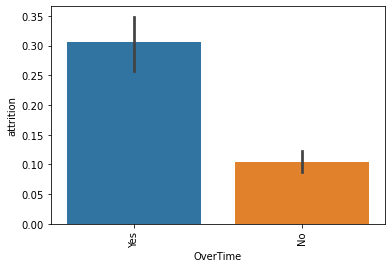

In [15]:
a = sns.barplot(data=employee_data, x='OverTime', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

4. Department vs Attrition

[Text(0, 0, 'Sales'),
 Text(1, 0, 'Research & Development'),
 Text(2, 0, 'Human Resources')]

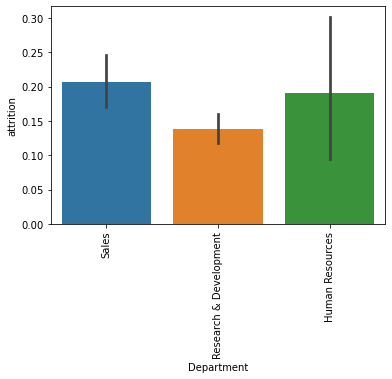

In [16]:
a = sns.barplot(data=employee_data, x='Department', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

5. EducationField vs Attrition

[Text(0, 0, 'Life Sciences'),
 Text(1, 0, 'Other'),
 Text(2, 0, 'Medical'),
 Text(3, 0, 'Marketing'),
 Text(4, 0, 'Technical Degree'),
 Text(5, 0, 'Human Resources')]

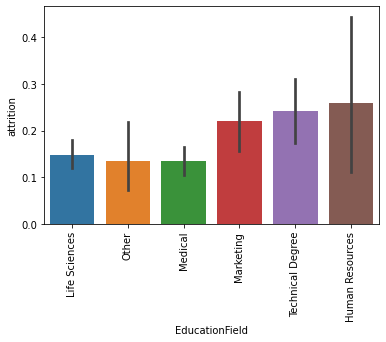

In [17]:
a = sns.barplot(data=employee_data, x='EducationField', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

6. Gender vs Attrition

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

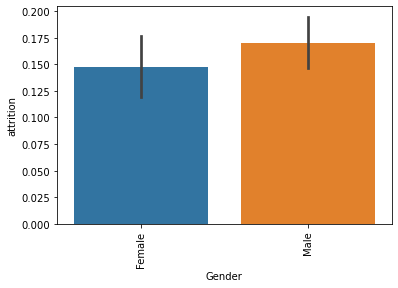

In [18]:
a = sns.barplot(data=employee_data, x='Gender', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

7. Marital Status vs Attrition

[Text(0, 0, 'Single'), Text(1, 0, 'Married'), Text(2, 0, 'Divorced')]

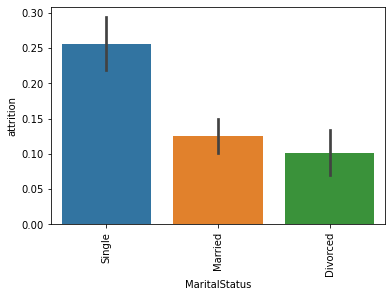

In [19]:
a = sns.barplot(data=employee_data, x='MaritalStatus', y=at['attrition'])
a.set_xticklabels(a.get_xticklabels(), rotation=90)

9. Age vs Attrition

<AxesSubplot:xlabel='Age', ylabel='count'>

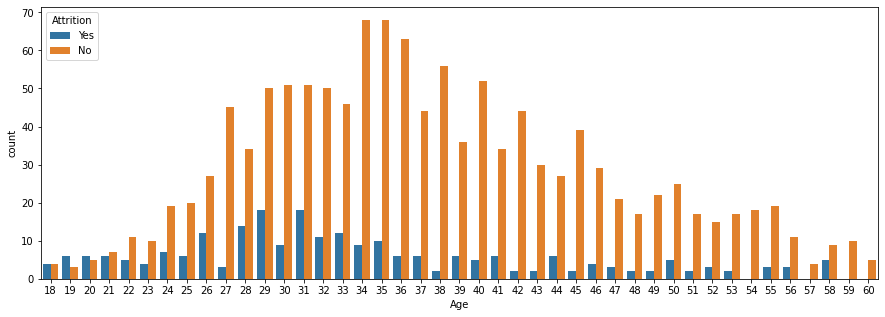

In [20]:
plt.subplots(figsize=(15,5))
sns.countplot(data=employee_data, x = 'Age', hue='Attrition')

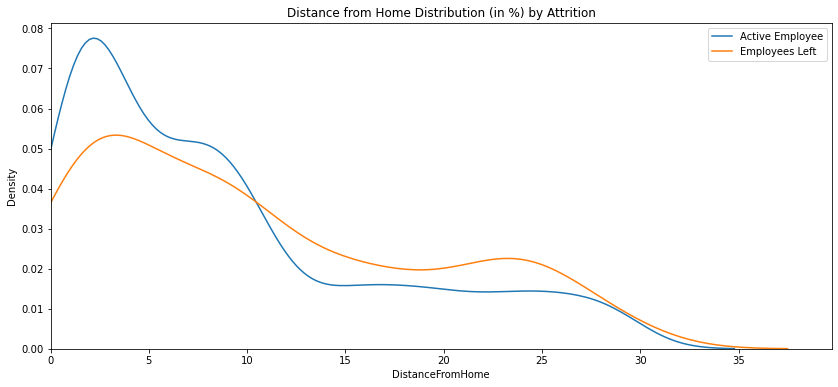

In [204]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'DistanceFromHome'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'DistanceFromHome'], label = 'Employees Left')
plt.xlabel('DistanceFromHome')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Distance from Home Distribution (in %) by Attrition');
leg = plt.legend();

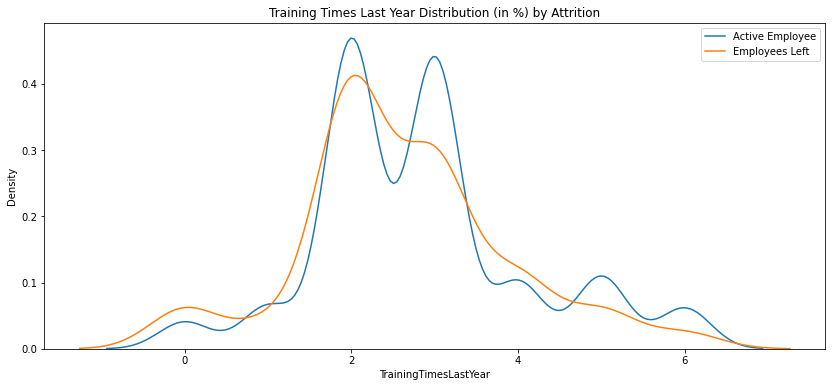

In [205]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'TrainingTimesLastYear'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'TrainingTimesLastYear'], label = 'Employees Left')
plt.xlabel('TrainingTimesLastYear')
plt.ylabel('Density')
plt.title('Training Times Last Year Distribution (in %) by Attrition');
leg = plt.legend();

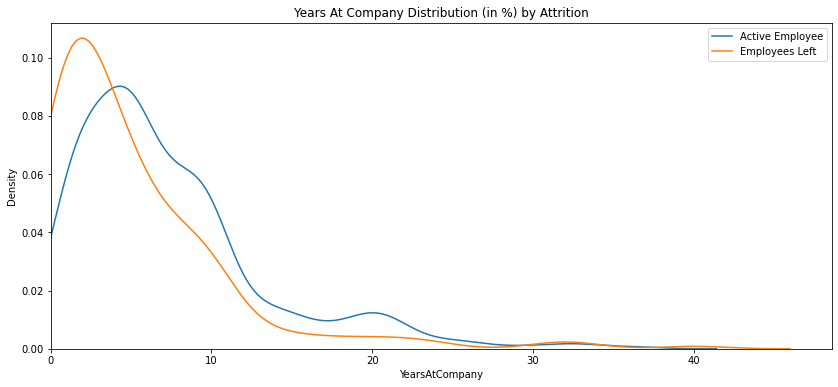

In [206]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'YearsAtCompany'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'YearsAtCompany'], label = 'Employees Left')
plt.xlabel('YearsAtCompany')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years At Company Distribution (in %) by Attrition');
leg = plt.legend();

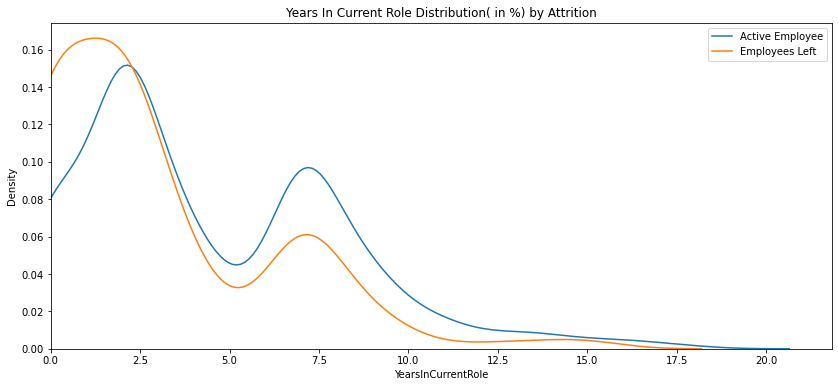

In [207]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'YearsInCurrentRole'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'YearsInCurrentRole'], label = 'Employees Left')
plt.xlabel('YearsInCurrentRole')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years In Current Role Distribution( in %) by Attrition');
leg = plt.legend();

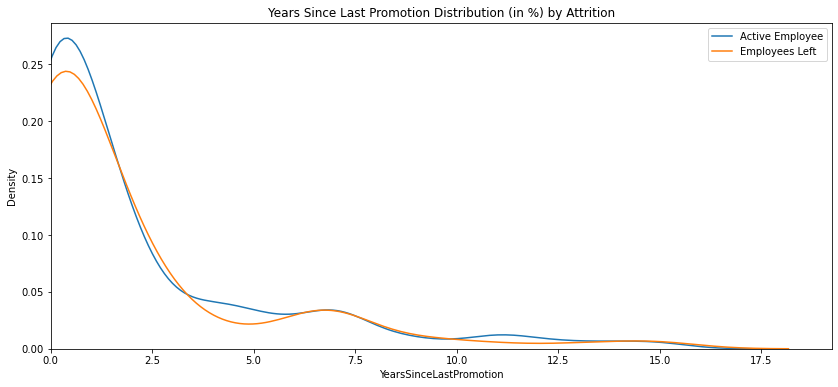

In [208]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'YearsSinceLastPromotion'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'YearsSinceLastPromotion'], label = 'Employees Left')
plt.xlabel('YearsSinceLastPromotion')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years Since Last Promotion Distribution (in %) by Attrition');
leg = plt.legend();

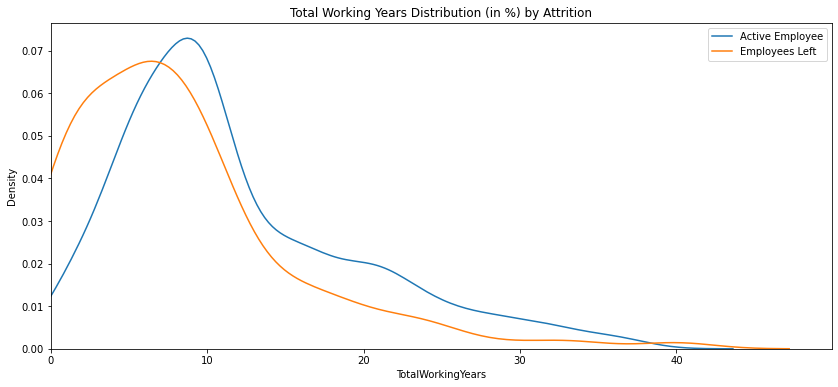

In [209]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'TotalWorkingYears'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'TotalWorkingYears'], label = 'Employees Left')
plt.xlabel('TotalWorkingYears')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Total Working Years Distribution (in %) by Attrition');
leg = plt.legend();

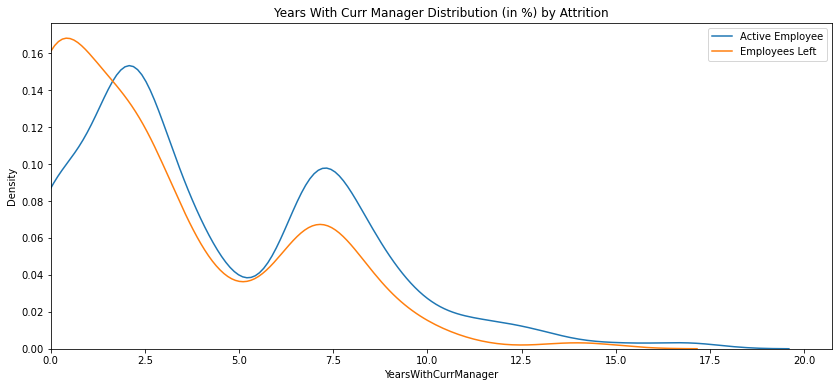

In [210]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'YearsWithCurrManager'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'YearsWithCurrManager'], label = 'Employees Left')
plt.xlabel('YearsWithCurrManager')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Years With Curr Manager Distribution (in %) by Attrition');
leg = plt.legend();

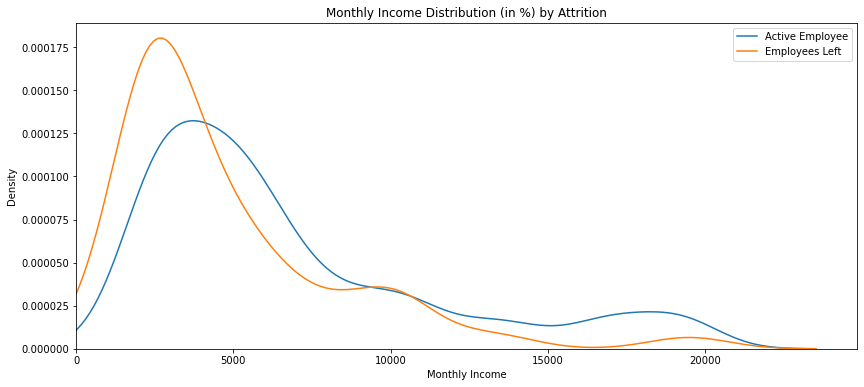

In [211]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'MonthlyIncome'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'MonthlyIncome'], label = 'Employees Left')
plt.xlabel('Monthly Income')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Monthly Income Distribution (in %) by Attrition');
leg = plt.legend();

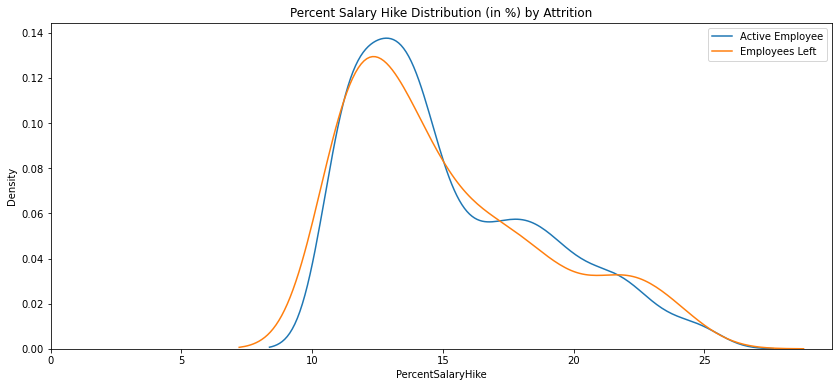

In [212]:
plt.figure(figsize=(14,6))
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'No', 'PercentSalaryHike'], label = 'Active Employee')
sns.kdeplot(employee_data.loc[employee_data['Attrition'] == 'Yes', 'PercentSalaryHike'], label = 'Employees Left')
plt.xlabel('PercentSalaryHike')
plt.xlim(left=0)
plt.ylabel('Density')
plt.title('Percent Salary Hike Distribution (in %) by Attrition');
leg = plt.legend();

1. Data looks skewed on several features so transformation will be required.
1. Employees from the *Human Resource* department are more likely to retain as compared to other departments.
1. Employees who travel a lot are more likely to change job as compared to others.
1. Employees with education level Human Resources are more likely to change job.
1. Employees with *JobRole* *Sales Representative* and *Human Resource* are more likely to leave.
1. Employees who do overtime are more likely to leave.
1. Employees traveling more then 10 miles are more likely to leave.
1. Emplyees, in the current year of joining or after 30years are more likely to leave.
1. Employees are more likely to leave in the first year at current role.
1. Employees at the early stage in work profile are more likely to leave (less then 7 years experience). Also after 40 years as well.
1. Employees are more likey to leave in initial 2 year to working under a manager.
1. Employees with salary less then 5k are more likely to leave.
1. Employees are more like to have when getting very less or very high salary hike.


In [213]:
print("Percentage of Employees working is {:.1f}% and % of employees left is: {:.1f}%".format(
    employee_data[employee_data['Attrition'] == 'No'].shape[0] / employee_data.shape[0]*100,
    employee_data[employee_data['Attrition'] == 'Yes'].shape[0] / employee_data.shape[0]*100))

Percentage of Employees working is 83.9% and % of employees left is: 16.1%


**So even if a model always predict employee will not leave then still it will be 83.9% correct. So model constructed should have a better prediction which means accuracy % will need to be higher then 83.9 as well.**

## Make data ready for model

I will use one hot encoding to convert categorical data into numeric values. Also I will stage the data between value of 0 and 1 as model works better with data in same scale.

In [43]:
employee_datac = employee_data.copy()

In [44]:
# label encoder
le = LabelEncoder()
le_count = 0
# encode categorical data now.
for column in employee_datac.columns[1:]:
    if employee_datac[column].dtype == 'object':
        if len(list(employee_datac[column].unique())) <= 2:
            le.fit(employee_datac[column])
            employee_datac[column] = le.transform(employee_datac[column])
            le_count += 1
print('{} columns were label encoded.'.format(le_count))

# convert rest of categorical variable into dummy
employee_datac = pd.get_dummies(employee_datac, drop_first=True)

3 columns were label encoded.


Now lets see how does our data looks.

In [45]:
# Now lets see how does our data looks.
print(employee_datac.shape)
employee_datac.head()

(1470, 45)


,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1102,1,2,2,0,94,3,2,...,0,0,0,0,0,0,1,0,0,1
1,49,0,279,8,1,3,1,61,2,2,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1373,2,2,4,1,92,2,1,...,0,1,0,0,0,0,0,0,0,1
3,33,0,1392,3,4,4,0,56,3,1,...,0,0,0,0,0,1,0,0,1,0
4,27,0,591,2,1,1,1,40,3,1,...,0,1,0,0,0,0,0,0,1,0


Perform scalling now with in the range of 0 and 1.

In [46]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
employee_col = list(employee_datac.columns)
employee_col.remove('Attrition')
for col in employee_col:
    employee_datac[col] = employee_datac[col].astype(float)
    employee_datac[[col]] = scaler.fit_transform(employee_datac[[col]])
employee_datac['Attrition'] = pd.to_numeric(employee_datac['Attrition'], downcast='float')
employee_datac.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,0.547619,1.0,0.715820,0.000000,0.25,0.333333,0.0,0.914286,0.666667,0.25,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.738095,0.0,0.126700,0.250000,0.00,0.666667,1.0,0.442857,0.333333,0.25,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.452381,1.0,0.909807,0.035714,0.25,1.000000,1.0,0.885714,0.333333,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.0,0.923407,0.071429,0.75,1.000000,0.0,0.371429,0.666667,0.00,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.214286,0.0,0.350036,0.035714,0.00,0.000000,1.0,0.142857,0.666667,0.00,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Split data into training & testing set

In [47]:
target = employee_datac['Attrition'].copy()

In [48]:
# remove the target feature now
employee_datac.drop(['Attrition'], axis=1, inplace=True)
print('Size of Full dataset is: {}'.format(employee_datac.shape))

Size of Full dataset is: (1470, 44)


I will be using parameter stratify=y so that so that distribution will be balanced.

In [62]:
# split train and test data
X_train, X_test, y_train, y_test = train_test_split(employee_datac,
                                                    target,
                                                    test_size=0.25,
                                                    random_state=7,
                                                    stratify=target)  
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

X_train shape:  (1102, 44)
y_train shape:  (1102,)
X_test shape:  (368, 44)
y_test shape:  (368,)


Lets create a range of different models
1. Logistic Regression
1. Random Forest
1. SVM
1. kNN
1. Decision Tree
1. Gaussian NB
1. Neural Network
1. XGBoost

In [143]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=44, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [144]:
# selection of algorithms to consider and set performance measure
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', random_state=7,
                                                         class_weight='balanced')))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, random_state=7)))
models.append(('SVM', SVC(gamma='auto', random_state=7)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(random_state=7)))
models.append(('Gaussian NB', GaussianNB()))
models.append(('Neural Network', KerasClassifier(build_fn=create_model, epochs=40, batch_size=10, verbose=0)))
models.append(('XGBoost',XGBClassifier(n_estimators=100, random_state=7)))

Now lets run these all the models and compare their performance and accordingly to we select models for further research.

In [145]:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD', 
       'Accuracy Mean', 'Accuracy STD']
df_results = pd.DataFrame(columns=col)
i = 0
# evaluate each model using cross-validation
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=7, shuffle=True)  # 10-fold cross-validation

    cv_acc_results = model_selection.cross_val_score(  # accuracy scoring
        model, X_train, y_train, cv=kfold, scoring='accuracy')

    cv_auc_results = model_selection.cross_val_score(  # roc_auc scoring
        model, X_train, y_train, cv=kfold, scoring='roc_auc')

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    df_results.loc[i] = [name,
                         round(cv_auc_results.mean()*100, 2),
                         round(cv_auc_results.std()*100, 2),
                         round(cv_acc_results.mean()*100, 2),
                         round(cv_acc_results.std()*100, 2)
                         ]
    i += 1
df_results.sort_values(by=['ROC AUC Mean'], ascending=False)

/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:57] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:58] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:35:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:00] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[06:36:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:36:01] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
2,SVM,81.95,7.01,83.85,1.89
0,Logistic Regression,81.40,6.77,75.96,4.37
6,Neural Network,81.21,6.38,87.30,3.75
1,Random Forest,80.05,5.44,85.03,2.83
7,XGBoost,78.27,6.19,86.39,2.58
5,Gaussian NB,75.11,5.02,66.33,4.99
3,KNN,66.22,5.32,84.67,2.33
4,Decision Tree Classifier,65.52,6.37,80.22,3.94


From the above matrics below modules seems prmising based on Accuracy and ROC AUC.

1. SVM
1. Logistic Regression
1. Neural Network
1. XGBoost

Lets plot accuracy peformance as well.

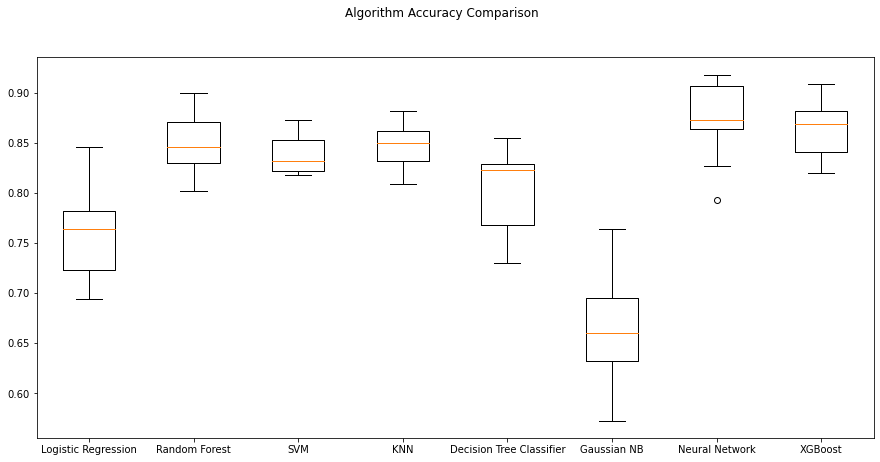

In [146]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm Accuracy Comparison')
ax = fig.add_subplot(111)
plt.boxplot(acc_results)
ax.set_xticklabels(names)
plt.show()

Based on accuracy XGBoost and Neural Networks are best performing models.

Lets plot ROC & AUC comparison as well.

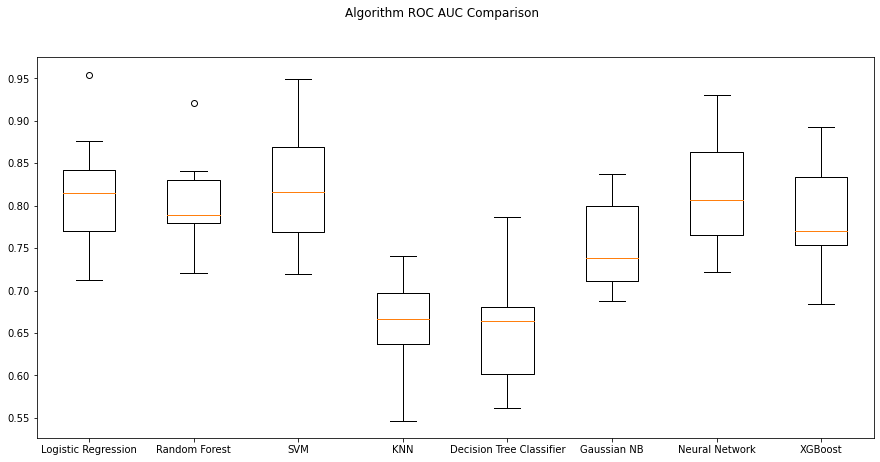

In [147]:
fig = plt.figure(figsize=(15, 7))
fig.suptitle('Algorithm ROC AUC Comparison')
ax = fig.add_subplot(111)
plt.boxplot(auc_results)
ax.set_xticklabels(names)
plt.show()

Based on ROC & AUC comparision below models as best:
1. SVM
1. Logistic Regression
1. Neural Network
1. XGBoost
1. Random Forest

So I am planning to further research below models.

1. SVM
1. Logistic Regression
1. Neural Network
1. XGBoost

## Model Hyperparameter Tuning

**SVM**

In [150]:
kfold = model_selection.KFold(n_splits=10, random_state=7, shuffle=True)
modelCV = SVC(gamma='auto', random_state=7)
scoring = 'roc_auc'
results = model_selection.cross_val_score(
    modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("AUC score (STD): %.3f (%.3f)" % (results.mean(), results.std()))

AUC score (STD): 0.819 (0.070)


I am using GridSearch for the hyperparameter tuning

In [215]:
# set different parameters
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
# setup grid
svc_gs = GridSearchCV(SVC(gamma='auto', random_state=7),
                      refit = True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)

# fit model
svc_grid = svc_gs.fit(X_train, y_train)
# get best performer
svc_opt = svc_grid.best_estimator_
# save results
svc_results = svc_gs.cv_results_


print('-'*25)
print("best params: " + str(svc_gs.best_estimator_))
print("best params: " + str(svc_gs.best_params_))
print('best score:', svc_gs.best_score_)
print('-'*25)

-------------------------
best params: SVC(C=1000, gamma=0.0001, random_state=7)
best params: {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
best score: 0.8198892265336865
-------------------------


Display performance matrics now

Text(0.5, 257.44, 'Predicted label')

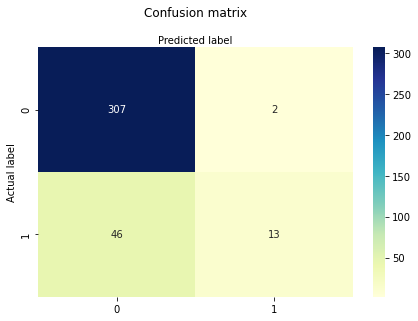

In [152]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, svc_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [153]:
print('Accuracy of SVM on test set: {:.3f}'.format(svc_opt.score(X_test, y_test)*100))

Accuracy of SVM on test set: 86.957


In [158]:
# Classification report for the optimised SVM
svc_opt.fit(X_train, y_train)
print(classification_report(y_test, svc_opt.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       309
         1.0       0.87      0.22      0.35        59

    accuracy                           0.87       368
   macro avg       0.87      0.61      0.64       368
weighted avg       0.87      0.87      0.84       368



Display ROC AUC curve

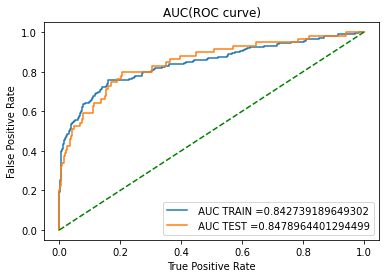

AUC score: 0.848


In [164]:
y_test_pred = svc_opt.decision_function(X_test) 
y_train_pred = svc_opt.decision_function(X_train) 
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.grid()

plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.plot([0,1],[0,1],'g--')
plt.legend()
plt.xlabel("True Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("AUC(ROC curve)")
plt.grid(color='black', linestyle='-', linewidth=0.5)
plt.show()

svc_roc_auc = roc_auc_score(y_test, y_test_pred) # calculate AUC score using test dataset
print('AUC score: %.3f' % svc_roc_auc)


**Neural Network**   Based on batch & epoches

In [216]:
# define the grid search parameters
# batch size & epoches
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [40, 60, 80]
param_grid = dict(batch_size=batch_size, epochs=epochs)

# Setup grid
nna_gs = GridSearchCV(KerasClassifier(build_fn=create_model, verbose=0),
                    refit = True,
                    return_train_score=True,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    n_jobs=-1,
                    cv=10)

# Fit now
nna_grid = nna_gs.fit(X_train, y_train)

# Best esitmator
nna_opt = nna_grid.best_estimator_

# Best result
nna_results = nna_gs.cv_results_

print('-'*25)
print("best params: " + str(nna_gs.best_estimator_))
print("best params: " + str(nna_gs.best_params_))
print('best score:', nna_gs.best_score_)
print('-'*25)

-------------------------
best params: <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9f2bc98bd0>
best params: {'batch_size': 100, 'epochs': 80}
best score: 0.8314237764971646
-------------------------


See results of each run

In [166]:
means = nna_gs.cv_results_['mean_test_score']
stds = nna_gs.cv_results_['std_test_score']
params = nna_gs.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

0.815042 (0.082281) with: {'batch_size': 10, 'epochs': 40}
0.804149 (0.085734) with: {'batch_size': 10, 'epochs': 60}
0.810569 (0.086123) with: {'batch_size': 10, 'epochs': 80}
0.820394 (0.068353) with: {'batch_size': 20, 'epochs': 40}
0.809751 (0.072868) with: {'batch_size': 20, 'epochs': 60}
0.804505 (0.074455) with: {'batch_size': 20, 'epochs': 80}
0.816315 (0.062771) with: {'batch_size': 40, 'epochs': 40}
0.811091 (0.063052) with: {'batch_size': 40, 'epochs': 60}
0.826170 (0.075990) with: {'batch_size': 40, 'epochs': 80}
0.805854 (0.059705) with: {'batch_size': 60, 'epochs': 40}
0.819266 (0.063703) with: {'batch_size': 60, 'epochs': 60}
0.819665 (0.067027) with: {'batch_size': 60, 'epochs': 80}
0.802704 (0.062792) with: {'batch_size': 80, 'epochs': 40}
0.820941 (0.067127) with: {'batch_size': 80, 'epochs': 60}
0.820362 (0.070424) with: {'batch_size': 80, 'epochs': 80}
0.804191 (0.062523) with: {'batch_size': 100, 'epochs': 40}
0.815073 (0.072186) with: {'batch_size': 100, 'epochs':

Display performance matrics

Text(0.5, 257.44, 'Predicted label')

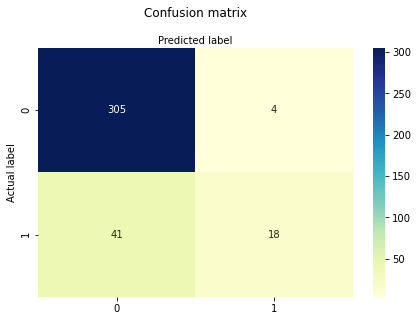

In [167]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, nna_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Fit best model and get AUC score

In [168]:
nna_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = nna_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
nna_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % nna_roc_auc)

AUC score: 0.832


**Neural Network**   Based on estimetors

In [217]:
## Model function
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(16, input_dim=44, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(8, activation='relu', kernel_constraint=tf.keras.constraints.max_norm(3)))
    model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
nnb_gs = GridSearchCV(KerasClassifier(build_fn=create_model, epochs=60, batch_size=40, verbose=0),
                    refit = True,
                    return_train_score=True,
                    param_grid=param_grid,
                    scoring='roc_auc',
                    n_jobs=-1,
                    cv=10)
# Fit now
nnb_grid = nnb_gs.fit(X_train, y_train)

# Get best
nnb_opt = nnb_grid.best_estimator_

# Save result
nnb_results = nnb_gs.cv_results_

print('-'*25)
print("best params: " + str(nnb_gs.best_estimator_))
print("best params: " + str(nnb_gs.best_params_))
print('best score:', nnb_gs.best_score_)
print('-'*25)

-------------------------
best params: <keras.wrappers.scikit_learn.KerasClassifier object at 0x7f9f2f9bf290>
best params: {'optimizer': 'Adam'}
best score: 0.8249634992645258
-------------------------


Display performance

Text(0.5, 257.44, 'Predicted label')

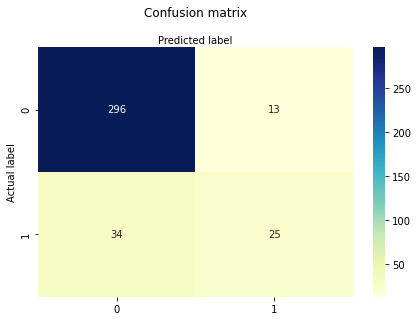

In [170]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, nnb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Fit best and display AUC score

In [171]:
nnb_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = nnb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
nnb_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % nnb_roc_auc)

AUC score: 0.860


**XGBoost**

In [218]:
## Running with 5 folds only as it was getting diffcult to run. Also did set only 200 max estimators because of same reason

xgb_cfl = XGBClassifier(n_jobs = -1)
# A parameter grid for XGBoost
params = {
        'n_estimators' : [50, 100,200],
        'learning_rate' : [0.01, 0.02, 0.05, 0.1, 0.25],
        'min_child_weight': [1, 5, 7, 10],
        'gamma': [0.1, 0.5, 1, 1.5, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5, 10, 12]
        }
folds = 5
param_comb = 800

xgb_search = RandomizedSearchCV(xgb_cfl, param_distributions=params, 
                                   n_iter=param_comb, 
                                   scoring='accuracy', 
                                   n_jobs=-1, 
                                   cv=5, 
                                   verbose=3, 
                                   random_state=42)

xgb_grid = xgb_search.fit(X_train, y_train)
xgb_opt = xgb_grid.best_estimator_
xgb_results = xgb_search.cv_results_

print('-'*25)
print("best params: " + str(xgb_search.best_estimator_))
print("best params: " + str(xgb_search.best_params_))
print('best score:', xgb_search.best_score_)
print('-'*25)

-------------------------
best params: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=5,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)
best params: {'subsample': 0.6, 'n_estimators': 50, 'min_child_weight': 10, 'max_depth': 5, 'learning_rate': 0.25, 'gamma': 1, 'colsample_bytree': 0.6}
best score: 0.8802221308103662
-------------------------


Display performance Matrics

Text(0.5, 257.44, 'Predicted label')

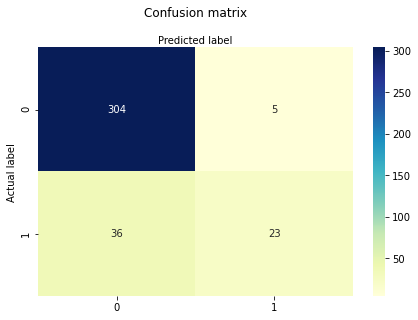

In [173]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, xgb_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Lets get feature importance now

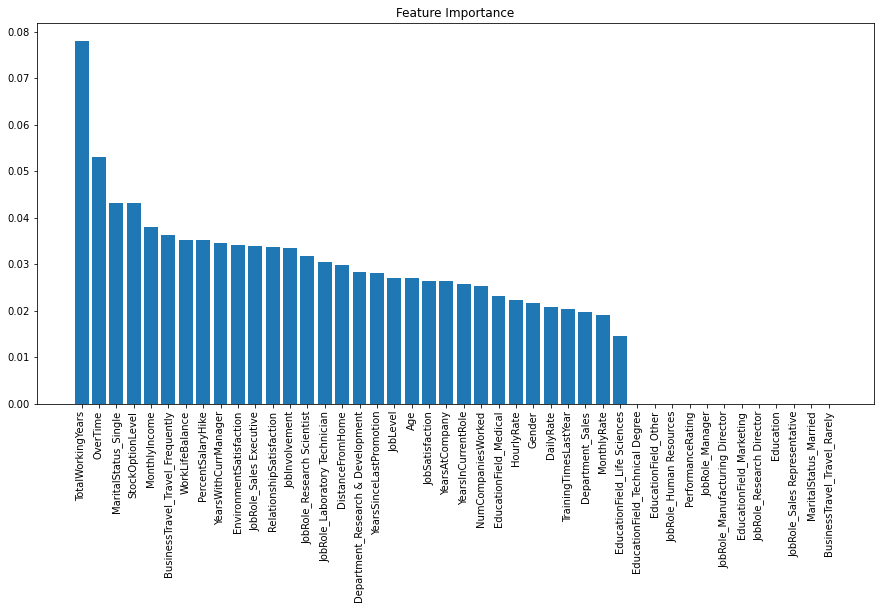

In [174]:
importances = xgb_opt.feature_importances_
indices = np.argsort(importances)[::-1] # Sort feature importances in descending order
names = [X_train.columns[i] for i in indices] # Rearrange feature names so they match the sorted feature importances
plt.figure(figsize=(15, 7)) # Create plot
plt.title("Feature Importance") # Create plot title
plt.bar(range(X_train.shape[1]), importances[indices]) # Add bars
plt.xticks(range(X_train.shape[1]), names, rotation=90) # Add feature names as x-axis labels
plt.show() # Show plot

Display in sorted fashon based on coefficient

In [175]:
importances = xgb_opt.feature_importances_
df_param_coeff = pd.DataFrame(columns=['Feature', 'Coefficient'])
for i in range(44):
    feat = X_train.columns[i]
    coeff = importances[i]
    df_param_coeff.loc[i] = (feat, coeff)
df_param_coeff.sort_values(by='Coefficient', ascending=False, inplace=True)
df_param_coeff = df_param_coeff.reset_index(drop=True)
df_param_coeff.head(10)


,Feature,Coefficient
0,TotalWorkingYears,0.077938
1,OverTime,0.053013
2,MaritalStatus_Single,0.043227
3,StockOptionLevel,0.043171
4,MonthlyIncome,0.037916
5,BusinessTravel_Travel_Frequently,0.036362
6,WorkLifeBalance,0.035297
7,PercentSalaryHike,0.035240
8,YearsWithCurrManager,0.034539
9,EnvironmentSatisfaction,0.034170


TotalWorkingYears was something I did not expect to me most infulecing feature from my initial study but it make sence to me now. As the employee gets older those employees are more likely to leave and there will be replacement resource required by employee and I am glad that we checked this grid of feature importance.

In [219]:
print('Accuracy of XGBoost Classifier on test set: {:.3f}'.format(xgb_opt.score(X_test, y_test)*100))


Accuracy of XGBoost Classifier on test set: 88.859


Lets fit the best and see AUC score

In [177]:
xgb_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = xgb_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
xgb_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % xgb_roc_auc)

[07:12:40] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
AUC score: 0.858


/Users/shanikumar/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


**Logistic Regression**

In [220]:
# set grid search parameters
param_grid = {'C': np.arange(1e-03, 2, 0.01)} # hyper-parameter list to fine-tune
log_gs = GridSearchCV(LogisticRegression(solver='liblinear', # setting GridSearchCV
                                         class_weight="balanced", 
                                         random_state=7),
                      refit=True,
                      return_train_score=True,
                      param_grid=param_grid,
                      scoring='roc_auc',
                      cv=10)
# fit grid
log_grid = log_gs.fit(X_train, y_train)
# get best
log_opt = log_grid.best_estimator_
# save result
results = log_gs.cv_results_

print('-'*25)
print("best params: " + str(log_gs.best_estimator_))
print("best params: " + str(log_gs.best_params_))
print('best score:', log_gs.best_score_)
print('-'*25)

-------------------------
best params: LogisticRegression(C=1.9309999999999996, class_weight='balanced',
                   random_state=7, solver='liblinear')
best params: {'C': 1.9309999999999996}
best score: 0.8151377162989242
-------------------------


Display Peformance Matrics

Text(0.5, 257.44, 'Predicted label')

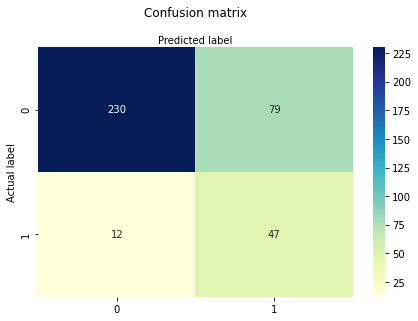

In [183]:
## Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, log_opt.predict(X_test))
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [221]:
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(log_opt.score(X_test, y_test)*100))

Accuracy of Logistic Regression Classifier on test set: 75.272


Lets fir best and get AUC score

In [190]:
log_opt.fit(X_train, y_train) # fit optimised model to the training data
probs = log_opt.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
logist_roc_auc = roc_auc_score(y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % logist_roc_auc)

AUC score: 0.857


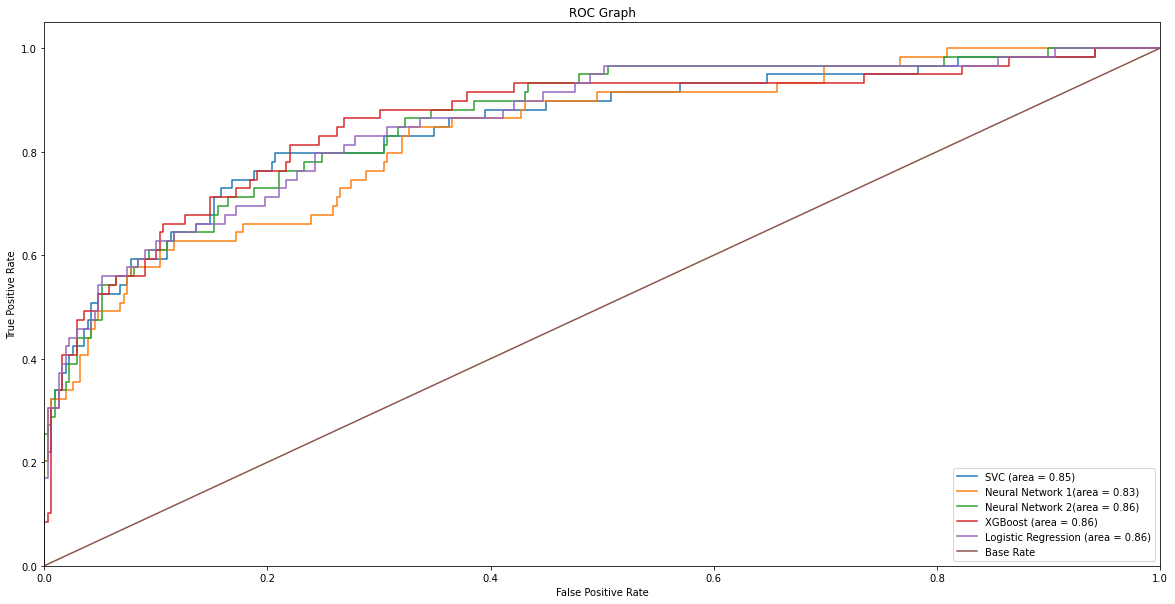

In [222]:
# Create ROC Graph
l_fpr, l_tpr, lp_thresholds = roc_curve(y_test, log_opt.predict_proba(X_test)[:,1])
s_fpr, s_tpr, sv_thresholds = roc_curve(y_test, y_test_pred)
nna_fpr, nna_tpr, nna_thresholds = roc_curve(y_test, nna_opt.predict_proba(X_test)[:,1])
nnb_fpr, nnb_tpr, nnb_thresholds = roc_curve(y_test, nnb_opt.predict_proba(X_test)[:,1])
xgb_fpr, xgb_tpr, xgb_thresholds = roc_curve(y_test, xgb_opt.predict_proba(X_test)[:,1])
plt.figure(figsize=(20, 10))

# Plot SVC ROC
plt.plot(s_fpr, s_tpr, label='SVC (area = %0.2f)' % svc_roc_auc)
# Plot Neural Network1 ROC
plt.plot(nna_fpr, nna_tpr, label='Neural Network 1(area = %0.2f)' % nna_roc_auc)
# Plot Neural Network2 ROC
plt.plot(nnb_fpr, nnb_tpr, label='Neural Network 2(area = %0.2f)' % nnb_roc_auc)
# Plot XGBoost ROC
plt.plot(xgb_fpr, xgb_tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
# Plot Logistic Regression ROC
plt.plot(l_fpr, l_tpr, label='Logistic Regression (area = %0.2f)' % logist_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

Based on the above curve, it seems like XGBoost, Neural netowrks 2 and Logistic Regression as best performing models.

## Conclusion

With the help of machine learning algorithms, employeers will be able to predict employees at risk of leaving. I believe by ingesting more data to machine learning model will help us get better results from what we have achieved here in our research. Also I think based on the model, Employeer should be able to create different risk category of employee leaving.

Also, HR team can use the feature importance as thier referance point to see how to categories the employees and handle each case.

I also think, Employeer should keep retaining model as the new data comes in. This will help them track nuke trands as well as model performance. If the model performance going down, thier might more work result to handle new data and get new models accordigly.